In [1]:
#call libraries
import pandas as pd
import hvplot.pandas
from pathlib import Path
import holoviews as hv
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales_df = pd.read_csv(Path("../data/sales_data_sample.csv"),encoding=('ISO-8859-1'))

In [3]:
sales_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


# *Data Cleaning & Transformation*

In this part of project, I will try to transform and clean the dataset into analysis-ready with taking into account that I will also use this preprocessed data to visualization using Tableau

In [5]:
# Dictionary to map month IDs to month names
month_id_to_name = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

sales_df['MonthName'] = sales_df['MONTH_ID'].map(month_id_to_name)

In [6]:
#make new column for country code
sales_df['CountryCode'] = sales_df['COUNTRY'].str[:3].str.upper()

In [7]:
#full name column
sales_df['ContactFullName'] = sales_df['CONTACTFIRSTNAME'] + ' ' + sales_df['CONTACTLASTNAME']

In [8]:
sales_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,MonthName,CountryCode,ContactFullName
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,NY,10022,USA,NaN,Yu,Kwai,Small,February,USA,Kwai Yu
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,NaN,51100,France,EMEA,Henriot,Paul,Small,May,FRA,Paul Henriot
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,July,FRA,Daniel Da Cunha
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,CA,90003,USA,NaN,Young,Julie,Medium,August,USA,Julie Young
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,CA,NaN,USA,NaN,Brown,Julie,Medium,October,USA,Julie Brown


In [9]:
null_counts = sales_df.isnull().sum()
null_counts

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
MonthName              0
CountryCode            0
ContactFullName        0
dtype: int64

In [10]:
null_percentages = (sales_df.isnull().sum() / len(sales_df)) * 100
null_percentages

ORDERNUMBER          0.000000
QUANTITYORDERED      0.000000
PRICEEACH            0.000000
ORDERLINENUMBER      0.000000
SALES                0.000000
ORDERDATE            0.000000
STATUS               0.000000
QTR_ID               0.000000
MONTH_ID             0.000000
YEAR_ID              0.000000
PRODUCTLINE          0.000000
MSRP                 0.000000
PRODUCTCODE          0.000000
CUSTOMERNAME         0.000000
PHONE                0.000000
ADDRESSLINE1         0.000000
ADDRESSLINE2        89.302161
CITY                 0.000000
STATE               52.639036
POSTALCODE           2.692171
COUNTRY              0.000000
TERRITORY           38.044633
CONTACTLASTNAME      0.000000
CONTACTFIRSTNAME     0.000000
DEALSIZE             0.000000
MonthName            0.000000
CountryCode          0.000000
ContactFullName      0.000000
dtype: float64

As can be seen here, I have transformed the dataframe(table) into a bigger version by adding new columns. I also ensure that data is free from unnecessary row like *null*.

# *Data Visualization*
This section will help us to harness the power of python visualization libraries to visually observe any customers' buying pattern through different kind of charts.

In [59]:
#total sales based on Month
sales_df.hvplot.hist("SALES",by = "MonthName", subplots = True, ylabel = 'Sales Distribution', xlabel = 'Sales', width = 300, height = 150, sorter=month_order )

C:\Users\hhn19\anaconda3\envs\dev\lib\site-packages\holoviews\core\data\pandas.py:241: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset.data.groupby(group_by, sort=False)]


:NdLayout   [MonthName]
   :Histogram   [SALES]   (SALES_count)

In [18]:

data = sales_df.groupby(['YEAR_ID', 'MONTH_ID'])['SALES'].sum().reset_index()

data.hvplot.bar(x='YEAR_ID', y='SALES', by = 'MONTH_ID', title= 'Earnings Per Year')

C:\Users\hhn19\anaconda3\envs\dev\lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Bars   [YEAR_ID,MONTH_ID]   (SALES)

In [12]:
productline_sales_per_month = sales_df.groupby(['MonthName', 'PRODUCTLINE'])['SALES'].sum().reset_index()                                                            

In [13]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
productline_sales_per_month['MonthName'] = pd.Categorical(productline_sales_per_month['MonthName'], categories=month_order, ordered=True)
productline_sales_per_month = productline_sales_per_month.sort_values('MonthName')

In [62]:
#more details into what drive the sales each month
productline_sales_per_month

,MonthName,PRODUCTLINE,SALES
34,January,Vintage Cars,196129.58
33,January,Trucks and Buses,78530.63
32,January,Trains,19026.58
31,January,Ships,61287.40
30,January,Planes,46715.81
...,...,...,...
17,December,Ships,24079.94
18,December,Trains,23181.14
19,December,Trucks and Buses,104133.74
20,December,Vintage Cars,131216.63


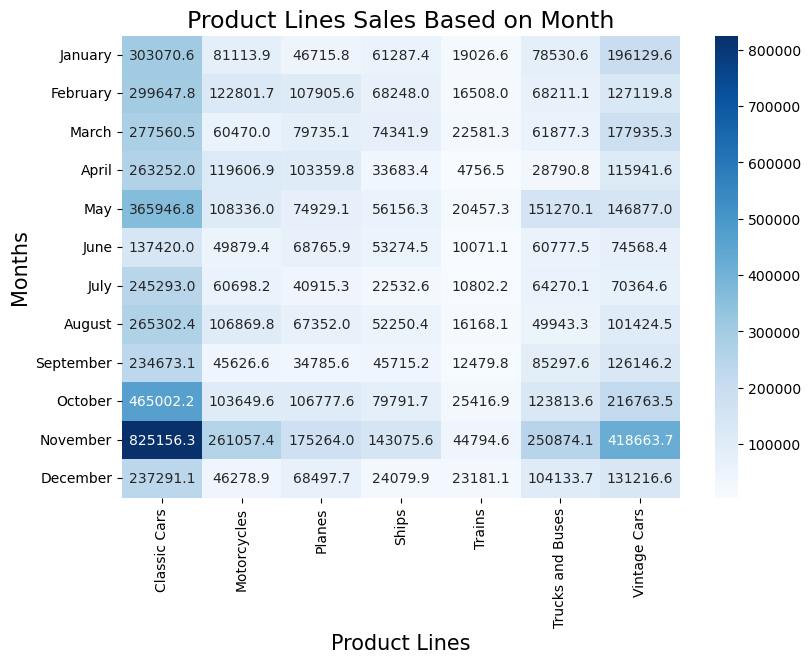

In [15]:
productline_sales = productline_sales_per_month.pivot(index="MonthName", columns = "PRODUCTLINE", values = "SALES")
f, ax = plt.subplots(figsize=(9, 6))
figure = sns.heatmap(productline_sales, cmap ="Blues", annot = True, fmt= ".1f", ax=ax)
plt.title('Product Lines Sales Based on Month', fontsize = 17)
plt.xlabel('Product Lines', fontsize= 15)
plt.ylabel('Months', fontsize = 15)
plt.show()

In [16]:
sales_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,MonthName,CountryCode,ContactFullName
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,NY,10022,USA,NaN,Yu,Kwai,Small,February,USA,Kwai Yu
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,NaN,51100,France,EMEA,Henriot,Paul,Small,May,FRA,Paul Henriot
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,July,FRA,Daniel Da Cunha
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,CA,90003,USA,NaN,Young,Julie,Medium,August,USA,Julie Young
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,CA,NaN,USA,NaN,Brown,Julie,Medium,October,USA,Julie Brown


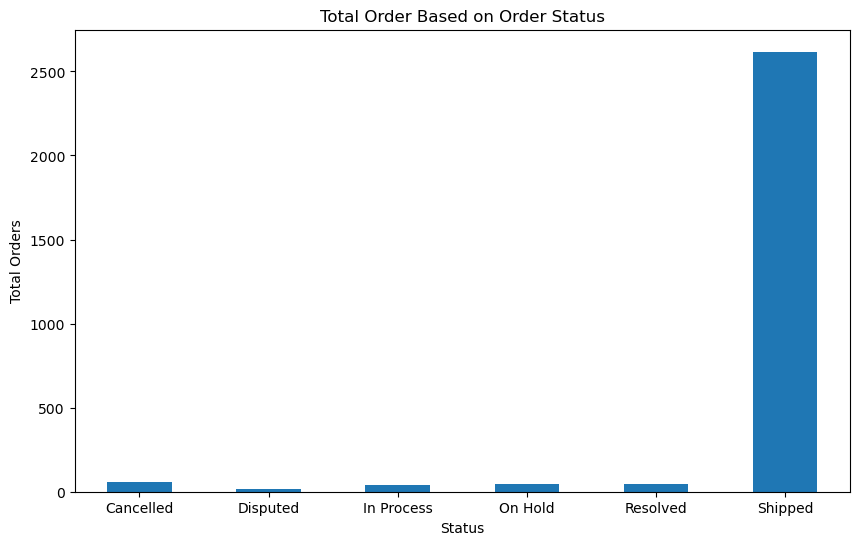

In [17]:
#Internal operation of business is equally important to external factor. This time we measured our efficiency by looking
#how order are flowing from the store onto customers'address. Is there hiccup in our workflow? if so, what is our customer recovery action? 
status_count = sales_df.groupby('STATUS')['ORDERNUMBER'].count()
status_count.plot(kind = 'bar', figsize =(10,6))
plt.title('Total Order Based on Order Status')
plt.xlabel('Status')
plt.ylabel('Total Orders')
plt.xticks(rotation = 0)
plt.show()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
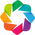

C:\Users\hhn19\anaconda3\envs\dev\lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
C:\Users\hhn19\anaconda3\envs\dev\lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:NdOverlay   [PRODUCTLINE]
   :Scatter   [QUANTITYORDERED]   (SALES)

In [20]:
#this scatter chart will display what is the normal range of quantity for every single order as well as outlier
hv.extension('bokeh')
sales_df.hvplot.scatter(x='QUANTITYORDERED', y='SALES', by='PRODUCTLINE',
                        legend = 'right', title ='Quantity Ordered per Product Lines', ylabel ='Sales', xlabel = 'Quantity Ordered',
                       height = 400, width =1000)

In [22]:
sales_df['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [23]:
#now we will identify where our customers originated 
top_5_country_sales = sales_df.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending= False).head(5)
top_5_country_sales.hvplot.bar(x= 'COUNTRY' , c = 'SALES', title='Top 5 Country by Sales',colorbar = True, xlabel = 'Country', ylabel ='Total Sales')

C:\Users\hhn19\anaconda3\envs\dev\lib\site-packages\holoviews\core\util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
C:\Users\hhn19\anaconda3\envs\dev\lib\site-packages\holoviews\core\util.py:1161: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
C:\Users\hhn19\anaconda3\envs\dev\lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Bars   [COUNTRY]   (SALES)

In [25]:
#We have done visualisation with by month and product lines and they all are explicitly provided in the datasource.
#To step up our analysis of customer behaviour, we will group our sales based on four seasons. Although, I do reckon that our customer 
#come from different countries, meaning seasonal pattern are diverse. So just for practice, let's assume our customers 
#are all based in a single country

copy = sales_df.copy()
copy['ORDERDATE'] = pd.to_datetime(copy['ORDERDATE'], format = '%m/%d/%Y %H:%M')
copy['day_of_month'] = copy['ORDERDATE'].dt.day
copy['day_of_week'] = copy['ORDERDATE'].dt.day_name()
copy['date_offset'] = (copy.ORDERDATE.dt.month*100 + copy.ORDERDATE.dt.day - 320)%1300
copy['season'] = pd.cut(copy['date_offset'], [0, 300, 602, 900, 1300], 
                          labels=['Spring', 'Summer', 'Fall', 'Winter'])

C:\Users\hhn19\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hhn19\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hhn19\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


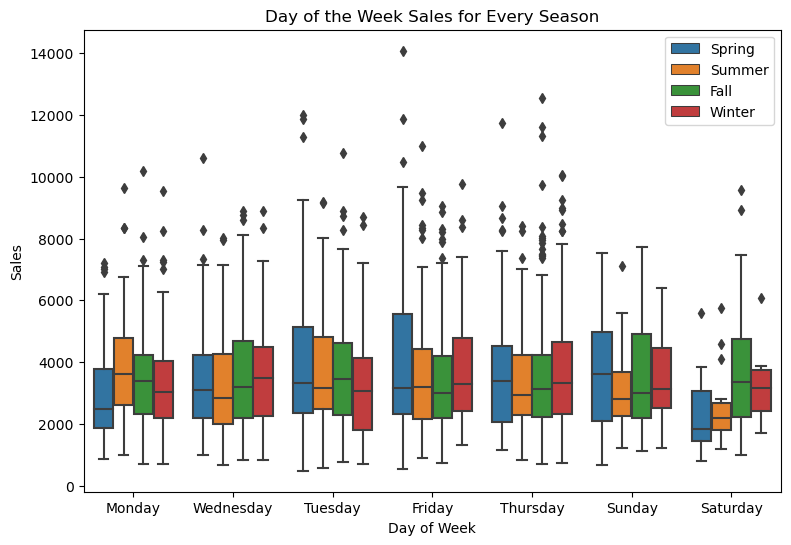

In [28]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.boxplot(data = copy, x = 'day_of_week', y = 'SALES', hue = 'season', ax= ax)
ax.set_title('Day of the Week Sales for Every Season')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Sales')
ax.legend(bbox_to_anchor = (1,1))
plt.show()

# *Time Series Forecasting With Prophet*

In [30]:
from prophet import Prophet

In [31]:
sales_df['ORDERDATE'] = pd.to_datetime(sales_df['ORDERDATE'], format = '%m/%d/%Y %H:%M')

In [32]:
print(sales_df['ORDERDATE'].min())
print(sales_df['ORDERDATE'].max())

2003-01-06 00:00:00
2005-05-31 00:00:00


In [33]:
sales_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,MonthName,CountryCode,ContactFullName
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,NY,10022,USA,NaN,Yu,Kwai,Small,February,USA,Kwai Yu
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,NaN,51100,France,EMEA,Henriot,Paul,Small,May,FRA,Paul Henriot
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,July,FRA,Daniel Da Cunha
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,CA,90003,USA,NaN,Young,Julie,Medium,August,USA,Julie Young
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,CA,NaN,USA,NaN,Brown,Julie,Medium,October,USA,Julie Brown


In [34]:
forecasting_df = sales_df[['ORDERDATE', 'SALES']]


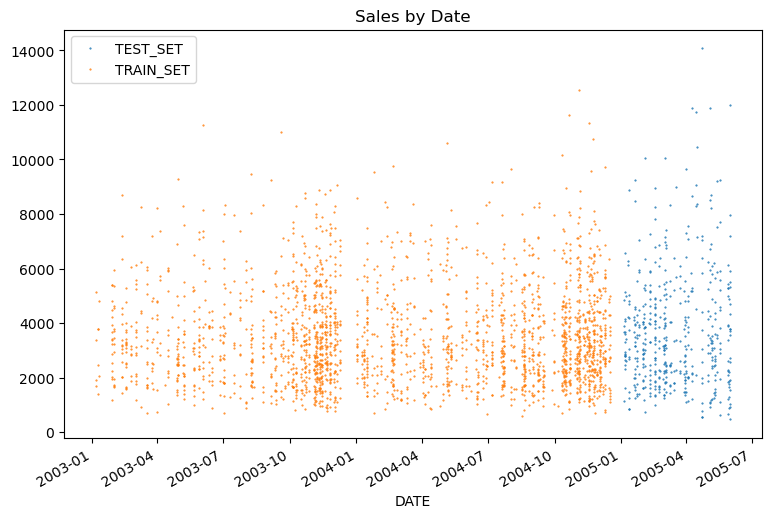

In [37]:
split_date = '2005-01-01'
sales_train = forecasting_df.loc[forecasting_df.ORDERDATE <= split_date].copy()
sales_test = forecasting_df.loc[forecasting_df.ORDERDATE >= split_date].copy()
sales_test.rename(columns = {'SALES' : 'TEST_SET', 'ORDERDATE' : 'DATE'}).merge(
    sales_train.rename(columns = {'SALES': 'TRAIN_SET', 'ORDERDATE': 'DATE'}), on= 'DATE', how = 'outer').plot(
    figsize = (9,6), 
    x='DATE',
    y= ['TEST_SET', 'TRAIN_SET'],
    title = 'Sales by Date', 
    style= '.' , 
    ms= 1)
plt.show()

In [38]:
sales_train

,ORDERDATE,SALES
0,2003-02-24,2871.00
1,2003-05-07,2765.90
2,2003-07-01,3884.34
3,2003-08-25,3746.70
4,2003-10-10,5205.27
...,...,...
2814,2004-10-14,2082.85
2815,2004-10-29,2227.60
2816,2004-11-10,3209.38
2817,2004-11-21,4080.72


In [39]:
model_sales = Prophet()

sales_train = sales_train.rename(columns = {'ORDERDATE':'ds', 'SALES':'y'})

#fit time series model to train data

model_sales.fit(sales_train)

20:05:57 - cmdstanpy - INFO - Chain [1] start processing
20:05:57 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
#making new dataframe to hold future trend
#picking 6 months into the future as our test data started from 2005-01-01 and ended in 2005-05-31
future_sales_trend = model_sales.make_future_dataframe(periods= 165  , freq = 'D')
future_sales_trend.tail()

,ds
362,2005-05-27
363,2005-05-28
364,2005-05-29
365,2005-05-30
366,2005-05-31


In [41]:
forecast_sales_trend = model_sales.predict(future_sales_trend)
forecast_sales_trend.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
362,2005-05-27,3534.091731,1247.195113,5843.006994,3534.051704,3534.130096,-33.041791,-33.041791,-33.041791,-33.041791,-33.041791,-33.041791,0.0,0.0,0.0,3501.049940
363,2005-05-28,3534.149925,1239.897934,5830.724294,3534.109921,3534.188736,-46.260511,-46.260511,-46.260511,-46.260511,-46.260511,-46.260511,0.0,0.0,0.0,3487.889414
364,2005-05-29,3534.208120,1290.679123,5761.323183,3534.167763,3534.247294,-14.627947,-14.627947,-14.627947,-14.627947,-14.627947,-14.627947,0.0,0.0,0.0,3519.580172
365,2005-05-30,3534.266314,1153.880719,5759.433583,3534.225602,3534.305675,-21.409930,-21.409930,-21.409930,-21.409930,-21.409930,-21.409930,0.0,0.0,0.0,3512.856384
366,2005-05-31,3534.324508,1530.619523,5994.775707,3534.283441,3534.364294,194.547226,194.547226,194.547226,194.547226,194.547226,194.547226,0.0,0.0,0.0,3728.871734


C:\Users\hhn19\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\hhn19\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


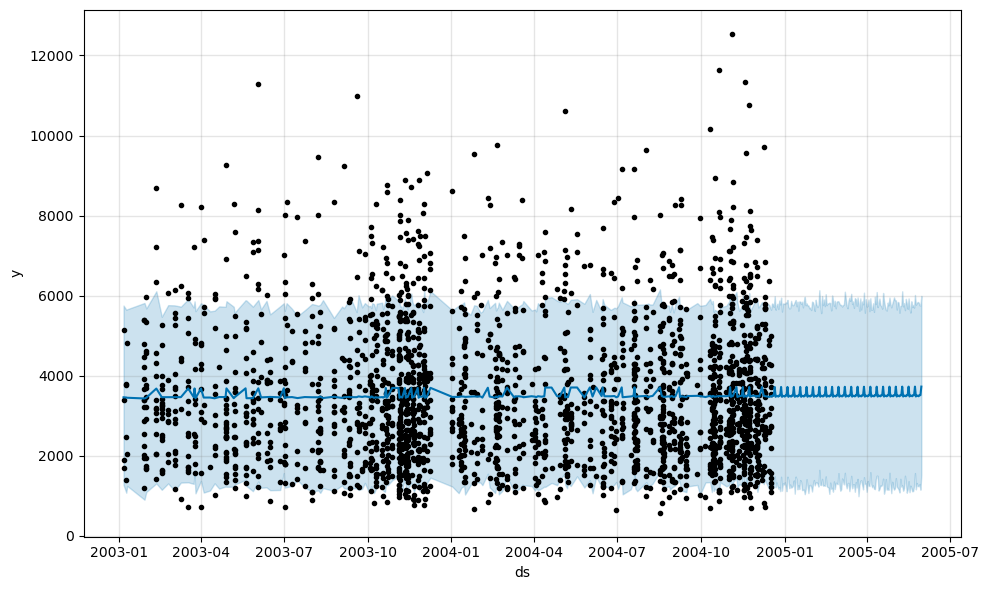

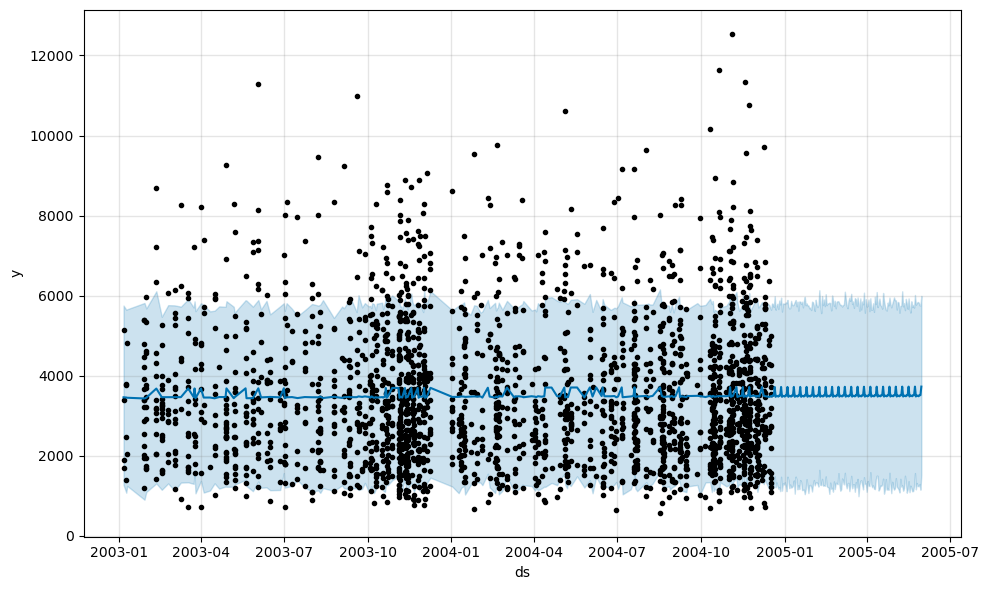

In [42]:
model_sales.plot(forecast_sales_trend)

In [43]:
copied_forecast = forecast_sales_trend.copy()

In [44]:
forecast_sales_trend = forecast_sales_trend.set_index('ds')

In [45]:
forecast_sales_trend[['yhat','yhat_lower','yhat_upper']].iloc[-165:,:].hvplot.line(
    x='ds', y =['yhat','yhat_lower','yhat_upper'], title = 'Forecast Sales Trend')

C:\Users\hhn19\anaconda3\envs\dev\lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
C:\Users\hhn19\anaconda3\envs\dev\lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:NdOverlay   [Variable]
   :Curve   [ds]   (value)